In [1]:
#importing required libraries

import pandas as pd
import numpy as np

import time
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data

df = pd.read_csv('transaction_data.csv', encoding='unicode_escape')

In [3]:
#shape of data
df.shape

(1083818, 8)

In [4]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


## Data Cleaning...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [6]:
#let's create new data_time column from TransationTime
list1 = {}
for i in range(len(df['TransactionTime'])):
    list1[i]=df['TransactionTime'][i].split(' ')

Week_day=[]
datetime=[]

for key,value in list1.items():
    Week_day.append(value[0])
    datetime.append(value[5]+'/'+value[1]+'/'+value[2]+" "+value[3])
df['Date_Time']=datetime

In [7]:
#converting object type column to datetime column
df['Date_Time']=pd.to_datetime(df['Date_Time'],errors='coerce')

In [8]:
#verifying date_time column
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date_Time
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02 12:50:00
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26 09:06:00
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15 09:45:00
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22 07:14:00
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10 11:58:00


In [9]:
#we can also add a week_day column and drop TransactionTime column
#only IST time Zone is used. so we can ignore it

#adding week_day column to our dataframe
df['Week_day']=Week_day
df.drop('TransactionTime',axis=1,inplace=True)
df.head()

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date_Time,Week_day
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02 12:50:00,Sat
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26 09:06:00,Wed
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2019-02-15 09:45:00,Fri
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22 07:14:00,Fri
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,2018-09-10 11:58:00,Mon


### we should take care that:
* UserId never negative or should be a real value
* NumberOfItemsPurchased cannot be negative
* CostPerItem cannot be negative


In [10]:
print('{:,} TransactionIds don\'t have a Userid'.format(df[df.UserId.isnull()].shape[0]))

0 TransactionIds don't have a Userid


In [11]:
print('Orders from {} to {}'.format(df['Date_Time'].min(),
                                    df['Date_Time'].max()))

Orders from 2018-02-12 04:26:00 to 2028-02-18 14:36:00


### The dataset contains transactions on an e-commerce website between the period Feb 2018 to Feb 2019 from customers across different countries. 
* so, that samples with year 2028 can be wrongly entered and we can remove them

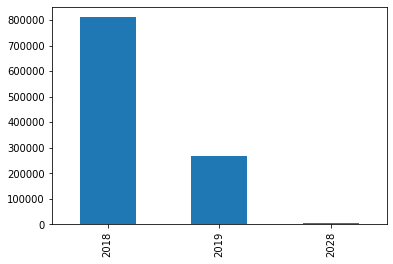

In [12]:
df['Date_Time'].dt.year.value_counts().plot(kind="bar")

In [13]:
#we have false information, so we can remove it
df = df.query('Date_Time.dt.year <= 2019').reset_index(drop=True)

In [14]:
df.shape

(1077892, 9)

In [15]:
1083818-1077892

5926

In [16]:
df['Date_Time'].dt.year.value_counts()

2018    810656
2019    267236
Name: Date_Time, dtype: int64

In [17]:
#lets check UserId
df['UserId'].min()

-1

In [18]:
df = df[df['UserId']>0]

In [19]:
df.shape

(811392, 9)

In [20]:
df['UserId'].min()

259266

In [21]:
#lets check transactionId and Item Codes
df['TransactionId'].min(), df['ItemCode'].min()

(5900015, -1)

In [22]:
#transactionId is good but not ItemCode
df = df[df['ItemCode']>0]

In [23]:
df.shape

(807828, 9)

In [24]:
#Number of items purchased must be greater than 0
df=df[df['NumberOfItemsPurchased']>0]

In [25]:
df.shape

(790792, 9)

In [26]:
df['NumberOfItemsPurchased'].max()

242985

In [27]:
#cost per item should  not be negative
df['CostPerItem'].max()

1696285.44

In [28]:
#let's see how many purchases in each country
df['Country'].value_counts()

United Kingdom          706068
Germany                  17286
France                   15954
EIRE                     14472
Spain                     4846
Netherlands               4652
Belgium                   3870
Switzerland               3622
Portugal                  2850
Australia                 2368
Norway                    2098
Channel Islands           1494
Italy                     1482
Finland                   1294
Cyprus                    1224
Sweden                     856
Austria                    768
Denmark                    734
Poland                     650
Japan                      642
Israel                     496
Unspecified                488
Singapore                  430
USA                        358
Iceland                    302
Canada                     300
Greece                     284
Malta                      218
United Arab Emirates       134
European Community         114
RSA                        114
Lebanon                     90
Lithuani

we have lot of purchases in United kingdom compared with other countries

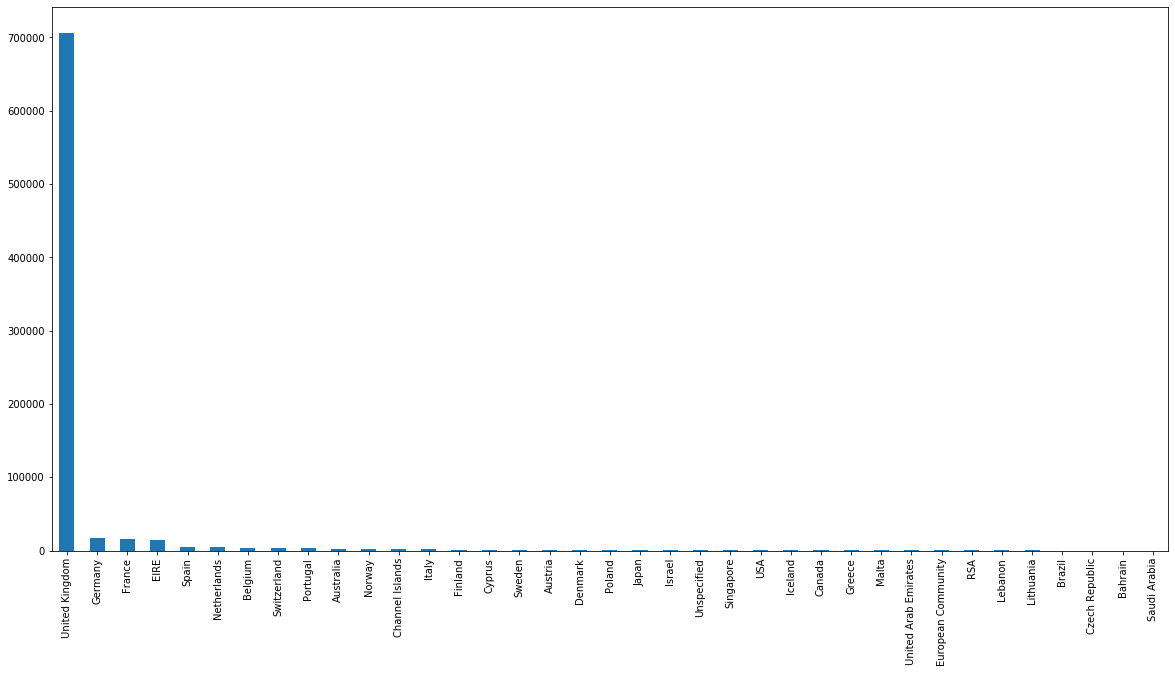

In [29]:
df['Country'].value_counts().plot(kind='bar', figsize=(20,10))

other countries are no match for united kingdom

So, we can take the samples from united kingdom only

In [30]:
df = df[df['Country']=='United Kingdom']

In [31]:
df.shape

(706068, 9)

In [32]:
print("Number of transactions: ", df['TransactionId'].nunique())
print("Number of products purchased: ",df['ItemCode'].nunique())
print("Number of customers:", df['UserId'].nunique() )

Number of transactions:  16514
Number of products purchased:  3185
Number of customers: 3912


In [33]:
# adding total price column
df['Total_Price']=df['NumberOfItemsPurchased']*df['CostPerItem']

In [34]:
df.head(10)

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date_Time,Week_day,Total_Price
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02 12:50:00,Sat,70.38
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26 09:06:00,Wed,10.56
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22 07:14:00,Fri,5.19
5,285957,6307136,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,2019-01-11 09:50:00,Fri,42.24
6,345954,6162981,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom,2018-09-28 10:51:00,Fri,61.56
8,339822,6255403,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom,2018-12-10 09:23:00,Mon,42.48
9,328440,6387425,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom,2019-02-16 10:35:00,Sat,143.64
10,316848,6262696,460215,RED HARMONICA IN BOX,36,1.73,United Kingdom,2018-12-15 10:05:00,Sat,62.28
11,372897,6199061,459669,WOODEN BOX OF DOMINOES,3,1.73,United Kingdom,2018-10-29 09:04:00,Mon,5.19
12,364791,6358242,486276,SET OF 5 MINI GROCERY MAGNETS,3,2.88,United Kingdom,2019-02-03 09:25:00,Sun,8.64


In [35]:
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem,Total_Price
count,706068.000000,7.060680e+05,7.060680e+05,706068.000000,7.060680e+05,7.060680e+05
mean,326589.565186,6.168121e+06,6.525814e+05,36.064914,8.757285e+00,2.001263e+02
std,33475.729322,1.444296e+05,4.394145e+05,572.093794,2.854896e+03,6.853074e+04
min,259266.000000,5.900015e+06,4.200000e+01,3.000000,0.000000e+00,0.000000e+00
25%,298074.000000,6.042201e+06,4.626090e+05,6.000000,1.730000e+00,1.728000e+01
50%,325941.000000,6.181263e+06,4.760910e+05,12.000000,2.700000e+00,4.248000e+01
75%,355551.000000,6.295333e+06,4.891110e+05,36.000000,5.180000e+00,7.344000e+01
max,384027.000000,6.397446e+06,1.894494e+06,242985.000000,1.696285e+06,4.071085e+07


{'whiskers': [<matplotlib.lines.Line2D at 0x18f21161b08>,
 'caps': [<matplotlib.lines.Line2D at 0x18f2116afc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f21169508>],
 'medians': [<matplotlib.lines.Line2D at 0x18f21171e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f21171f48>],
 'means': []}

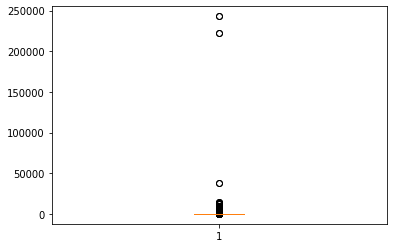

In [36]:
plt.boxplot(df['NumberOfItemsPurchased'])

In [37]:
#lets remove outliers
df=df[df['NumberOfItemsPurchased']<5000]

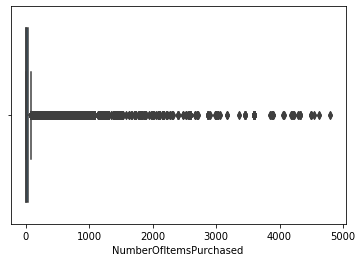

In [38]:
sns.boxplot(df['NumberOfItemsPurchased'])

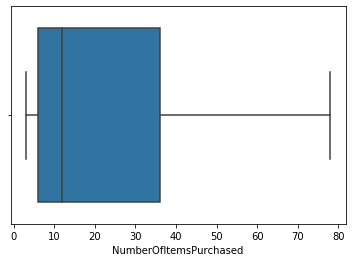

In [39]:
df_clean=df[df['NumberOfItemsPurchased']<81]
sns.boxplot(df_clean['NumberOfItemsPurchased'])

In [40]:
df_clean.shape

(665702, 10)

In [41]:
df_clean.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem,Total_Price
count,665702.000000,6.657020e+05,6.657020e+05,665702.000000,6.657020e+05,6.657020e+05
mean,326719.544475,6.168357e+06,6.479005e+05,20.106735,9.165739e+00,1.773573e+02
std,33423.972649,1.446239e+05,4.340240e+05,19.681276,2.940177e+03,7.056422e+04
min,267687.000000,5.900015e+06,4.200000e+01,3.000000,0.000000e+00,0.000000e+00
25%,298515.000000,6.042069e+06,4.627770e+05,6.000000,1.730000e+00,1.620000e+01
50%,326109.000000,6.182341e+06,4.761540e+05,12.000000,2.700000e+00,4.140000e+01
75%,355551.000000,6.295476e+06,4.889640e+05,36.000000,5.180000e+00,7.044000e+01
max,384027.000000,6.397446e+06,1.894494e+06,78.000000,1.696285e+06,4.071085e+07


In [42]:
#check for missing values
df_clean.isna().sum()

UserId                    0
TransactionId             0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Country                   0
Date_Time                 0
Week_day                  0
Total_Price               0
dtype: int64

In [43]:
print("Number of transactions: ", df_clean['TransactionId'].nunique())
print("Number of products purchased: ",df_clean['ItemCode'].nunique())
print("Number of customers:", df_clean['UserId'].nunique() )

Number of transactions:  15374
Number of products purchased:  3171
Number of customers: 3812


In [44]:
df_clean.shape

(665702, 10)

### Beautiful... Successfully cleaned our data

In [45]:
#let's save cleaned data to a .csv file
df_clean.to_csv('clean_transaction_data.csv')

In [46]:
df_clean.head(10)

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Date_Time,Week_day,Total_Price
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2019-02-02 12:50:00,Sat,70.38
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,2018-12-26 09:06:00,Wed,10.56
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,2018-06-22 07:14:00,Fri,5.19
5,285957,6307136,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,2019-01-11 09:50:00,Fri,42.24
6,345954,6162981,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom,2018-09-28 10:51:00,Fri,61.56
8,339822,6255403,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom,2018-12-10 09:23:00,Mon,42.48
9,328440,6387425,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom,2019-02-16 10:35:00,Sat,143.64
10,316848,6262696,460215,RED HARMONICA IN BOX,36,1.73,United Kingdom,2018-12-15 10:05:00,Sat,62.28
11,372897,6199061,459669,WOODEN BOX OF DOMINOES,3,1.73,United Kingdom,2018-10-29 09:04:00,Mon,5.19
12,364791,6358242,486276,SET OF 5 MINI GROCERY MAGNETS,3,2.88,United Kingdom,2019-02-03 09:25:00,Sun,8.64


In [47]:
#we can remove country column
df_clean.drop('Country',axis=1,inplace=True)

# EDA(Exploratory Data Analysis)

Our aim is to Explore and identify different segments present in the customer transaction data.

In [48]:
df_clean['Week_day'].value_counts()

Tue    130692
Fri    115690
Mon    113566
Sat    109064
Sun    108894
Wed     87796
Name: Week_day, dtype: int64

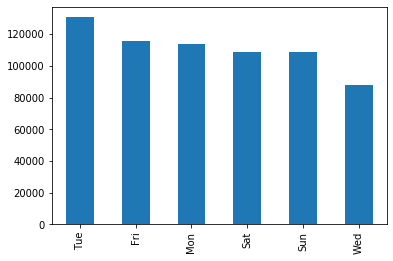

In [49]:
df_clean['Week_day'].value_counts().plot(kind='bar')


More sales are on Tuesday
Less sales are on Wednesday


* we have dates of purchase (how recently purchases are done)
* Number Of prchases (how many purchases are done)
* Total Money spent by a customer


### We can use RFM Analysis

In [50]:
df_clean['TransactionId'].value_counts().head()

6339729    1068
6371156    1046
6387997    1044
6360970     868
6309336     866
Name: TransactionId, dtype: int64

In [51]:
# we can see that a customer purchased many times
# let's us see how many purchases he made rather than how many items he bought

purchases = df_clean.groupby(['TransactionId', 'UserId', 'Date_Time']).agg({'Total_Price': lambda x: x.sum()}).reset_index()

In [52]:
purchases.head()

,TransactionId,UserId,Date_Time,Total_Price
0,5900015,374850,2018-02-12 04:26:00,1152.60
1,5900026,374850,2018-02-12 04:28:00,184.32
2,5900037,273987,2018-02-12 04:34:00,1861.80
3,5900048,273987,2018-02-12 04:34:00,580.68
4,5900059,273987,2018-02-12 04:35:00,147.96


In [53]:
purchases.shape

(15400, 4)

In [54]:
#we have data from Feb 2018 to Feb 2019
# to calculate recency let's take a reference date
ref_date = purchases['Date_Time'].max() + dt.timedelta(days=1)
ref_date
#we took reference date as one day after the last purchase

Timestamp('2019-02-21 08:49:00')

In [55]:
#calculating RFM_table dataframe from purchases dataframe
RFM_table=purchases.groupby('UserId').agg({'Date_Time': lambda x: (ref_date - x.max()).days,
                                            'TransactionId': lambda x: len(x.unique()),
                                            'Total_Price': lambda x: x.sum()}) 

In [56]:
RFM_table.head()

,Date_Time,TransactionId,Total_Price
UserId,,,
267687,2,11,25484.82
267708,1,199,202911.78
267729,4,5,33435.00
269220,3,4,7665.72
269241,214,1,769.56


In [57]:
RFM_table.rename(columns={'Date_Time':'Recency',
                         'TransactionId':'Frequency',
                         'Total_Price':'Monetory'}, inplace=True)

### calculating RFM scores...

In [58]:
#i am going to use quantiles
#20% of data in each quintile
quantiles = RFM_table.quantile(q=[0.2,0.4,0.6,0.8])
quantiles

,Recency,Frequency,Monetory
0.2,13.0,1.0,1644.432
0.4,33.0,2.0,3269.472
0.6,71.0,3.0,6077.112
0.8,178.0,5.0,13085.340


In [59]:
quantiles = quantiles.to_dict()

In [60]:
# calculate R_score
# writing a function to calculate R_score
# higher rank, more recency
def R_score(x):
    if x <= quantiles['Recency'][.2]:
        return 5
    elif x <= quantiles['Recency'][.4]:
        return 4
    elif x <= quantiles['Recency'][.6]:
        return 3
    elif x <= quantiles['Recency'][.8]:
        return 2
    else:
        return 1

In [61]:
# calculating FM_Scores
def FM_score(x, i):
    if x <= quantiles[i][.2]:
        return 1
    elif x <= quantiles[i][.4]:
        return 2
    elif x <= quantiles[i][.6]:
        return 3
    elif x <= quantiles[i][.8]:
        return 4
    else:
        return 5 
#here i is esither Frequency or Monetory

In [62]:
RFM_table['R'] = RFM_table['Recency'].apply(lambda x: R_score(x))
RFM_table['F'] = RFM_table['Frequency'].apply(lambda x: FM_score(x, 'Frequency'))
RFM_table['M'] = RFM_table['Monetory'].apply(lambda x: FM_score(x, 'Monetory'))

In [63]:
RFM_table.head()

,Recency,Frequency,Monetory,R,F,M
UserId,,,,,,
267687,2,11,25484.82,5,5,5
267708,1,199,202911.78,5,5,5
267729,4,5,33435.00,5,4,5
269220,3,4,7665.72,5,4,4
269241,214,1,769.56,1,1,1


we got RFM scores

Now, based on RFM scores we can segment our customers

In [64]:
#combined score
RFM_table['RFM Score'] = RFM_table['R'].map(str) + RFM_table['F'].map(str) + RFM_table['M'].map(str)


In [65]:
RFM_table.head()

,Recency,Frequency,Monetory,R,F,M,RFM Score
UserId,,,,,,,
267687,2,11,25484.82,5,5,5,555
267708,1,199,202911.78,5,5,5,555
267729,4,5,33435.00,5,4,5,545
269220,3,4,7665.72,5,4,4,544
269241,214,1,769.56,1,1,1,111


In [66]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

RFM_table['Segment'] = RFM_table['R'].map(str) + RFM_table['F'].map(str)
RFM_table['Segment'] = RFM_table['Segment'].replace(segt_map, regex=True)

In [67]:
RFM_table.head()

,Recency,Frequency,Monetory,R,F,M,RFM Score,Segment
UserId,,,,,,,,
267687,2,11,25484.82,5,5,5,555,champions
267708,1,199,202911.78,5,5,5,555,champions
267729,4,5,33435.00,5,4,5,545,champions
269220,3,4,7665.72,5,4,4,544,champions
269241,214,1,769.56,1,1,1,111,hibernating


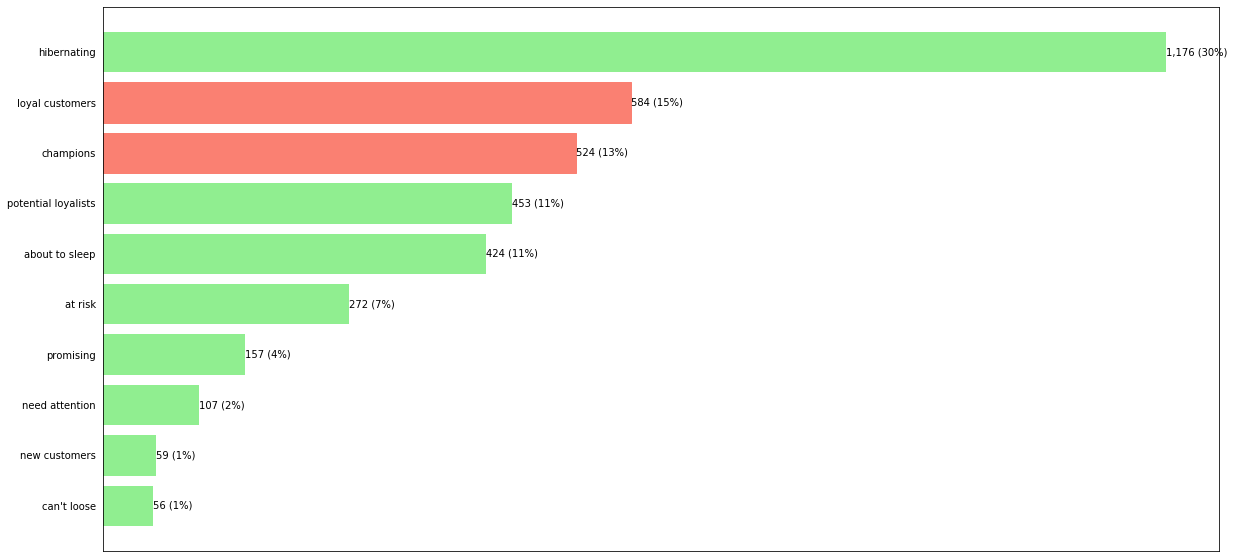

In [68]:
# count the number of customers in each segment
segments_counts = RFM_table['Segment'].value_counts().sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(20,10))
bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='lightgreen')
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

#for highlighting champions and loyal customers
#printing percentages at the end
for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('salmon')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left')
plt.show()

In [69]:
champions=RFM_table[RFM_table['Segment']=='champions']
champions.to_csv('champions.csv')

## we got our segments 

details of these segments is as follows:

# 1. Champions
    * Bought recently, buy often and spend the most


# 2.Loyal Customers
    * Buy on a regular basis. Responsive to promotions.


# 3.Potential Loyalist
    * Recent customers with average frequency.


# 4.Recent Customers
    * Bought most recently, but not often.


# 5.Promising
    * Recent shoppers, but haven’t spent much.


# 6.Customers Needing Attention
    * Above average recency, frequency and monetary values. May not have bought very recently though.


# 7.About To Sleep
    * Below average recency and frequency. Will lose them if not reactivated.


# 8.At Risk
    * Purchased often but a long time ago. Need to bring them back!


# 9.Can’t Lose Them
    * Used to purchase frequently but haven’t returned for a long time.


# 10.Hibernating
    * Last purchase was long back and low number of orders. May be lost.

# Visualization...

Text(0.5, 1.0, 'Recency Distribution')

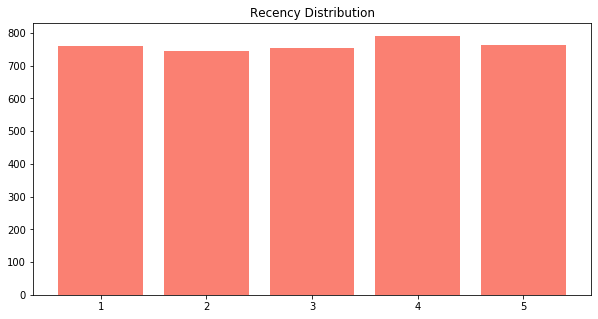

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
y = RFM_table['R'].value_counts().sort_index()
x=y.index
ax.bar(x,y,color="salmon")
ax.set_title('Recency Distribution')

In [71]:
#number of customers in each R score
RFM_table['R'].value_counts().sort_index()

1    760
2    744
3    753
4    791
5    764
Name: R, dtype: int64

In [72]:
# percentage of customers in each R score
RFM_table['R'].value_counts()/len(RFM_table['R'])*100

4    20.750262
5    20.041973
1    19.937041
3    19.753410
2    19.517314
Name: R, dtype: float64

Text(0.5, 1.0, 'Frequency Distribution')

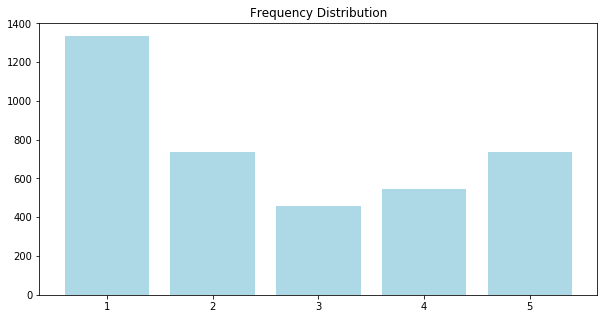

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
y = RFM_table['F'].value_counts().sort_index()
x=y.index
ax.bar(x,y,color="lightblue")
ax.set_title('Frequency Distribution')

In [74]:
#number of customers in each F score
RFM_table['F'].value_counts().sort_index()

1    1335
2     737
3     456
4     545
5     739
Name: F, dtype: int64

In [75]:
# percentage of customers in each F score
RFM_table['F'].value_counts()/len(RFM_table['F'])*100

1    35.020986
5    19.386149
2    19.333683
4    14.296957
3    11.962225
Name: F, dtype: float64

Text(0.5, 1.0, 'Monetory Distribution')

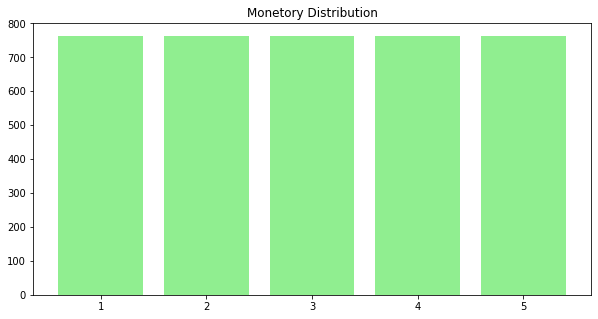

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
y = RFM_table['M'].value_counts().sort_index()
x=y.index
ax.bar(x,y,color="lightgreen")
ax.set_title('Monetory Distribution')

In [77]:
# percentage of customers in each M score
RFM_table['M'].value_counts()/len(RFM_table['M'])*100

5    20.015740
1    20.015740
3    19.989507
4    19.989507
2    19.989507
Name: M, dtype: float64

In [78]:
# percentage of customers in each R score
RFM_table['M'].value_counts()/len(RFM_table['M'])*100

5    20.015740
1    20.015740
3    19.989507
4    19.989507
2    19.989507
Name: M, dtype: float64

In [79]:
#customers in each segment
RFM_table['Segment'].value_counts()

hibernating            1176
loyal customers         584
champions               524
potential loyalists     453
about to sleep          424
at risk                 272
promising               157
need attention          107
new customers            59
can't loose              56
Name: Segment, dtype: int64

In [80]:
#percentage of customers in each segment
RFM_table['Segment'].value_counts()/len(RFM_table['Segment'])

hibernating            0.308499
loyal customers        0.153200
champions              0.137461
potential loyalists    0.118835
about to sleep         0.111228
at risk                0.071354
promising              0.041186
need attention         0.028069
new customers          0.015477
can't loose            0.014690
Name: Segment, dtype: float64

From above data:
    1. Most of the customers about 30% are in "hibernating" segment.
    2. we have good number of "champions" ans "loyal customers" about nearly 14% and 15% respectively.
    3. nearly 12% of "potential loyalists" and 11% of customers are "about to sleep".
    4. "promising" customers are 4% and 2% customers need attention
    5. Less number of "new customers" and customers "we can't loose".

Since most of the customers are "hibernating", we have to know about their areas of interest and give offers or subsidies into order to make them active.

Text(0, 0.5, 'Frequency')

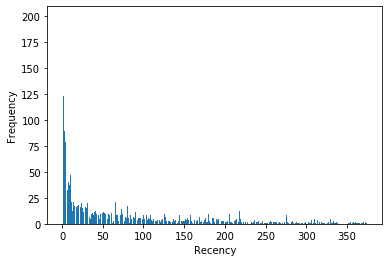

In [81]:
# recency vs frequency plot
plt.bar(RFM_table['Recency'], RFM_table['Frequency'])
plt.xlabel('Recency')
plt.ylabel('Frequency')

This shows that recently purchased customers are more active

if recency goes on decreasing the frequency also decresing.

In [82]:
RFM_table.head()

,Recency,Frequency,Monetory,R,F,M,RFM Score,Segment
UserId,,,,,,,,
267687,2,11,25484.82,5,5,5,555,champions
267708,1,199,202911.78,5,5,5,555,champions
267729,4,5,33435.00,5,4,5,545,champions
269220,3,4,7665.72,5,4,4,544,champions
269241,214,1,769.56,1,1,1,111,hibernating


<BarContainer object of 5 artists>

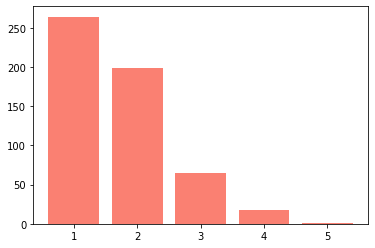

In [83]:
# Monetory graph for R_score = 1 and F_score = 1
y = RFM_table[(RFM_table['R'] == 1) & (RFM_table['F'] == 1)]['M'].value_counts().sort_index()
x = y.index
plt.bar(x,y,color='salmon')

<BarContainer object of 4 artists>

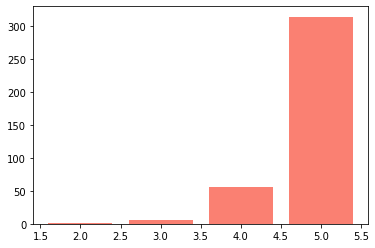

In [84]:
# Monetory graph for R_score = 5 and F_score = 5
y = RFM_table[(RFM_table['R'] == 5) & (RFM_table['F'] == 5)]['M'].value_counts().sort_index()
x = y.index
plt.bar(x,y,color='salmon')

like wise we will get 25 plots....let's plot all using subplots

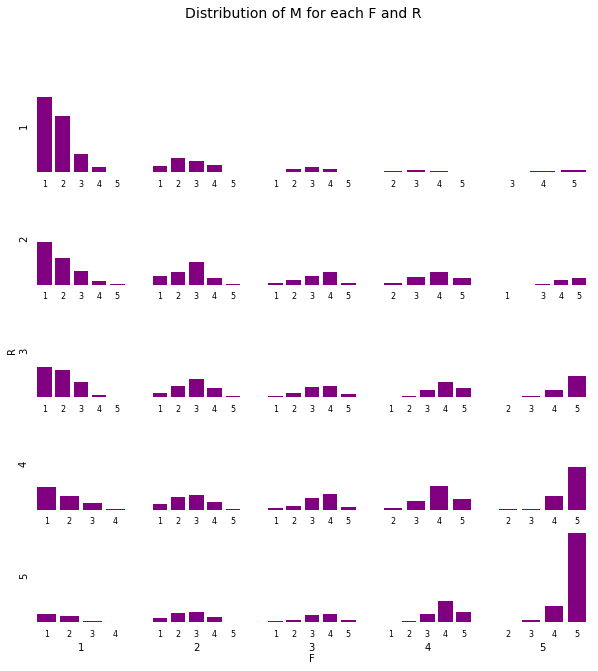

In [85]:
fig, axes = plt.subplots(5,5,figsize=(10, 10),sharex=False, sharey=True)

for r in range(1,6):
    for f in range(1,6):
        y = RFM_table[(RFM_table['R'] == r) & (RFM_table['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r-1,f-1]
        bar = ax.bar(x, y, color='purple')
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.show()

here we can see how Monetry changes for each R_scores and F_score

# * Segmentation using K-Means clustering *

In [86]:
df_clean.head()

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Date_Time,Week_day,Total_Price
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,2019-02-02 12:50:00,Sat,70.38
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,2018-12-26 09:06:00,Wed,10.56
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,2018-06-22 07:14:00,Fri,5.19
5,285957,6307136,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,2019-01-11 09:50:00,Fri,42.24
6,345954,6162981,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,2018-09-28 10:51:00,Fri,61.56


In [87]:
RFM_table.head()

,Recency,Frequency,Monetory,R,F,M,RFM Score,Segment
UserId,,,,,,,,
267687,2,11,25484.82,5,5,5,555,champions
267708,1,199,202911.78,5,5,5,555,champions
267729,4,5,33435.00,5,4,5,545,champions
269220,3,4,7665.72,5,4,4,544,champions
269241,214,1,769.56,1,1,1,111,hibernating


In [88]:
#we can use Recency, Frequency and Monetory features

rfm_data=RFM_table.drop(['R','F','M','RFM Score','Segment'],axis=1)

In [89]:
rfm_data.head()

,Recency,Frequency,Monetory
UserId,,,
267687,2,11,25484.82
267708,1,199,202911.78
267729,4,5,33435.00
269220,3,4,7665.72
269241,214,1,769.56


In [90]:
#we have normalize the Recency, Frequency and Monetory columns before fitting into a machine learning model
rfm_log = np.log(rfm_data)

In [91]:
rfm_log.head()

,Recency,Frequency,Monetory
UserId,,,
267687,0.693147,2.397895,10.145838
267708,0.000000,5.293305,12.220527
267729,1.386294,1.609438,10.417359
269220,1.098612,1.386294,8.944514
269241,5.365976,0.000000,6.645819


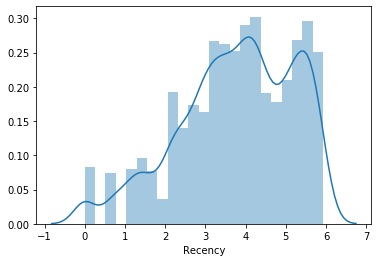

In [92]:
#let's plot
sns.distplot(rfm_log['Recency'])

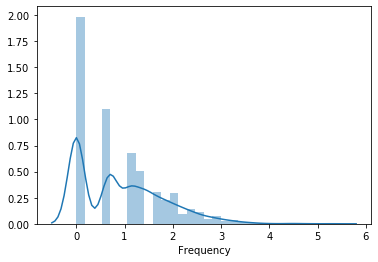

In [93]:
sns.distplot(rfm_log['Frequency'])

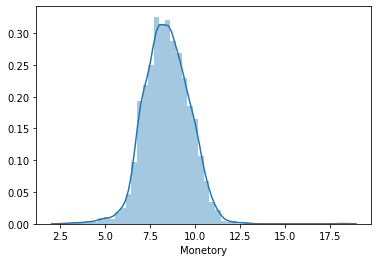

In [94]:
sns.distplot(rfm_log['Monetory'])

In [95]:
#we should also standardize
from sklearn.preprocessing import StandardScaler

In [96]:
scaler=StandardScaler()
scaler.fit(rfm_log)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
rfm_normalized = scaler.transform(rfm_log)

In [98]:
# it's time to import kmeans
from sklearn.cluster import KMeans

In [99]:
# sse - sum of squared errors
sse={}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_

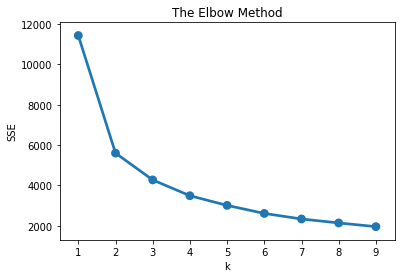

In [100]:
#elbow method to estimate k
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('SSE')
plt.show()

In [101]:
# taking num of clusters=4
kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(rfm_normalized)
y_kmeans = kmeans1.predict(rfm_normalized)
cluster_labels = kmeans1.labels_

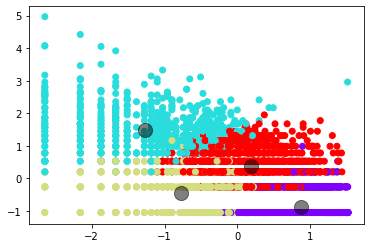

In [102]:
X=rfm_normalized
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='rainbow')
centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha=0.5);

In [103]:
rfm_k4 = rfm_data.assign(Cluster = cluster_labels)
rfm_k4.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','Monetory': ['mean','count']}).round(0)

Recency Frequency  Monetory      
           mean      mean      mean count
Cluster                                  
0         182.0       1.0    2149.0  1353
1          12.0      12.0  147897.0   691
2          19.0       2.0    3294.0   661
3          74.0       4.0    9743.0  1107

In [104]:
preds=pd.DataFrame(y_kmeans)

In [105]:
preds[0].value_counts()

0    1353
3    1107
1     691
2     661
Name: 0, dtype: int64

Text(0.5, 1.0, 'Clusters of Customers')

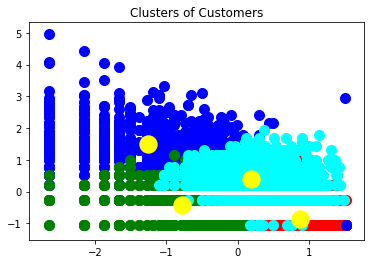

In [106]:
#otherway of plotting
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')

# Result:

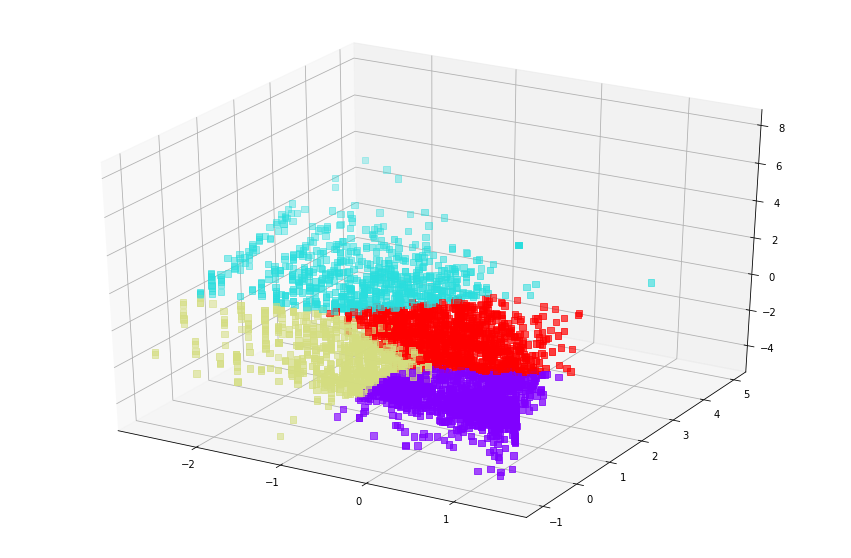

In [107]:
#3d view 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], marker="s", c=y_kmeans, s=40, cmap="rainbow")
plt.show()

In [108]:
#userIds into clusters
preds[0].head()

0    1
1    1
2    1
3    1
4    0
Name: 0, dtype: int32

In [109]:
preds[0].value_counts()

0    1353
3    1107
1     691
2     661
Name: 0, dtype: int64

In [112]:
RFM_table['clusters']=y_kmeans

In [113]:
RFM_table.head()

,Recency,Frequency,Monetory,R,F,M,RFM Score,Segment,clusters
UserId,,,,,,,,,
267687,2,11,25484.82,5,5,5,555,champions,1
267708,1,199,202911.78,5,5,5,555,champions,1
267729,4,5,33435.00,5,4,5,545,champions,1
269220,3,4,7665.72,5,4,4,544,champions,1
269241,214,1,769.56,1,1,1,111,hibernating,0
